## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
# Datenanalyse (1)

#### Daten importieren

In [1]:
from funktionen import *
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import math
from scipy import stats
from biofes import biplot
from sklearn.utils.extmath import randomized_svd
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
sns.set(style="whitegrid") #"whitegrid", "darkgrid"...
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2017-19_ber')

In [3]:
Daten.shape

(401, 377)

In [4]:
Daten.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b2a,D-Q8b4a,D-Q8b7a,D-Q8b8a,D-Q8b10a_7,D-Q8b11a,D-Q8b17a,D-Q8b18a,D-Q8b19a,D-Q8b22a
0,09.11.2017 13:10,09.11.2017 13:25,0,88.3.172.215,100,909,1,09.11.2017 13:25,R_1kOiXpqqaX3Irxm,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.11.2017 01:39,10.11.2017 01:54,0,212.128.135.110,100,897,1,10.11.2017 01:54,R_1F5FzvY7aYwiipy,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.11.2017 02:23,10.11.2017 02:39,0,212.128.135.84,100,935,1,10.11.2017 02:39,R_2ErWjTyNYcSh10N,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Glossar erstellen

Datei aufrufen, die in einem anderem Notebook erstellt und gespeichert wurde

In [5]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss2018')

#### Untergruppen und Listen für die Analyse

In [6]:
Daten_A3 = Daten[Daten['A-Q3_27'] >= 1]

In [7]:
Daten_A3.shape

(396, 377)

In [8]:
Finished = Daten[Daten['C-Q1_7'] >= 1]

In [9]:
Finished.shape

(391, 377)

In [10]:
Hauptstudie = Daten[Daten['pilot']!=1]

In [11]:
Hauptstudie_A3 = Hauptstudie[Hauptstudie['A-Q3_27'] >= 1]

In [12]:
Hauptstudie_fin = Hauptstudie[Hauptstudie['C-Q1_7'] >= 1]

Item-Listen erstellen:

In [13]:
Liste_A_Q2 = [col for col in Daten.columns if 'A-Q2' in col]

In [14]:
Liste_A_Q3 = [col for col in Daten.columns if 'A-Q3' in col]
Liste_A_Q3.pop(3)

'A-Q3_3_TEXT'

In [15]:
Liste_C_Q1 = [col for col in Daten.columns if 'C-Q1' in col]

In [16]:
Liste_A_Q = Liste_A_Q2 + Liste_A_Q3

In [17]:
Liste_AC_Q = Liste_A_Q + Liste_C_Q1

### Cronbach's Alpha berechnen

In [18]:
CronbachAlpha(Hauptstudie[Liste_A_Q2])

0.27143564250330227

In [19]:
CronbachAlpha(Daten[Liste_A_Q2])

0.3018915225555093

In [20]:
CronbachAlpha(Hauptstudie_A3[Liste_A_Q3])

0.883768307699594

In [21]:
CronbachAlpha(Daten_A3[Liste_A_Q3])

0.8845773413596196

In [22]:
CronbachAlpha(Hauptstudie_fin[Liste_C_Q1])

0.4922372666891664

In [23]:
CronbachAlpha(Finished[Liste_C_Q1])

0.4896684535094027

In [24]:
CronbachAlpha(Hauptstudie[Liste_AC_Q])

0.9045546881651827

In [25]:
CronbachAlpha(Daten[Liste_AC_Q])

0.918340317521501

### Zeitanalyse

In [26]:
Hauptstudie[(Hauptstudie['Finished']==1)&(Hauptstudie['IPAddress']!='2.154.100.40')].shape

(259, 377)

Für die Berechnung der Bearbeitungszeit der Online-Befragung dürfen nur die fertig ausgefüllten Fragebögen berücksichtigt werden. Zudem sind die von der Papier-Version übertragenen Daten von dieser Analyse auszuschließen.

In [27]:
Dur = pd.to_numeric(Hauptstudie[(Hauptstudie['Finished']==1)&(Hauptstudie['IPAddress']!='2.154.100.40')]['Duration (in seconds)'])

In [28]:
Dur.describe()

count       259.000000
mean       5386.208494
std       36137.409761
min         354.000000
25%         974.500000
50%        1228.000000
75%        1558.500000
max      535186.000000
Name: Duration (in seconds), dtype: float64

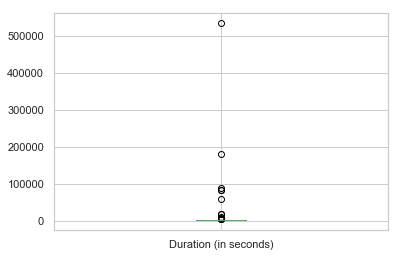

In [29]:
Dur.plot.box();

Überblick über die Beantwortungszeit und Darstellung in einem Boxplot, um Outlyer zu erkennen (Outlyer, z.B. TN, die die Befragung an einem Tag begonnen und später beendet haben, sollen für die Berechnung der Bearbeitungszeit nicht berücksichtigt werden.)

Sinnvoll ist, eine Grenze bei ca. einer Stunde Beantwortungszeit (3600 sek) festzulegen.

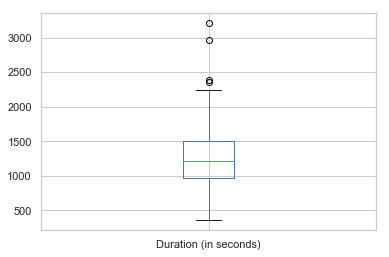

In [30]:
Dur[Dur < 4000].plot.box();

In [31]:
Dur[Dur < 4000].describe()

count     248.000000
mean     1265.516129
std       441.346917
min       354.000000
25%       960.000000
50%      1219.000000
75%      1509.500000
max      3215.000000
Name: Duration (in seconds), dtype: float64

In [32]:
(Dur[Dur < 4000].mean())/60

21.091935483870966

In [33]:
(Dur[Dur < 4000].min())/60

5.9

In [34]:
(Dur[Dur < 4000].std())/60

7.355781946374189

Schlussfolgerung:

Die durchschnittliche Beantwortungszeit liegt bei ca. 21 min, wobei berücksichtigt werden muss, dass TN außerhalb des Unterrichts Pausen einlegen konnten und dass z.T. bei der Beantwortung im Unterricht mehr Zeit für Erklärungen/Einloggen/Abwarten... aufgewendet wurde.

### Analyse der Angaben zur Strategiennutzung

### A-Q2 (7 Hauptbereiche)

Items:

1. Descubro el significado o la función de palabras nuevas en alemán gracias a mi lengua materna.
2. Descubro el significado o la función de palabras nuevas en alemán con la ayuda de otras lenguas.
3. Utilizo mis conocimientos de alemán, p. ej. otras palabras conocidas, clases de palabras o la formación de palabras compuestas. 
4. Utilizo información extraída del contexto, p. ej. la posición de una palabra en la frase o el formato del texto.
5. Pido ayuda a mi profesor/a.
6. Pido ayuda a mis compañeros/as de clase.
7. Consulto un diccionario u otra fuente (en papel o digital).


Deutsche Übersetzung:

1. Ich erschließe die Bedeutung oder Funktion unbekannter deutscher Wörter mit Hilfe meiner Muttersprache.
2. Ich erschließe unbekannte Wörter mit Hilfe anderer Sprachen.
3. Ich nutze mein Wissen über das Deutsche, z.B. andere bekannte Wörter, Wortarten oder Kompositabildung.
4. Ich nutze Informationen aus dem Kontext, z.B. die Position eines Wortes im Satz oder die Gestaltung des Textes.
5. Ich bitte meinen Lehrer/meine Lehrerin um Hilfe.
6. Ich bitte die anderen Kursteilnehmer/innen um Hilfe.
7. Ich konsultiere ein Wörterbuch, z.B. in der Printversion oder auf dem Handy.

#### Analyse der Gesamtgruppe

In [35]:
df_describe(Daten,Liste_A_Q2)

,count,mean,std,min,25%,50%,75%,max,mode,median,kurtosis,skew
A-Q2_1,401.0,2.528678,1.083882,1.0,2.0,3.0,3.0,5.0,3,3.0,-0.434352,0.346166
A-Q2_2,401.0,3.553616,0.847197,1.0,3.0,4.0,4.0,5.0,4,4.0,0.294238,-0.292816
A-Q2_3,401.0,3.865337,0.962715,1.0,3.0,4.0,5.0,5.0,4,4.0,-0.021329,-0.656811
A-Q2_4,401.0,4.067332,0.986385,1.0,3.0,4.0,5.0,5.0,5,4.0,-0.211534,-0.779476
A-Q2_5,401.0,3.431421,1.002951,1.0,3.0,3.0,4.0,5.0,4,3.0,-0.271425,-0.333629
A-Q2_6,401.0,3.229426,1.182046,1.0,2.0,3.0,4.0,5.0,4,3.0,-0.759092,-0.270053
A-Q2_7,401.0,4.301746,0.875341,1.0,4.0,5.0,5.0,5.0,5,5.0,1.672166,-1.346582


In [72]:
#df_describe(Daten,Liste_A_Q2).to_excel('D:\Daten\DISS\Daten\Deskriptiv_A2.xlsx')

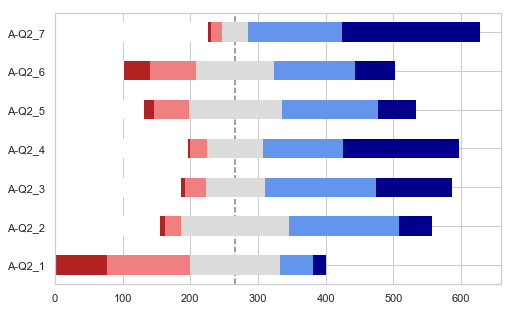

In [36]:
graf_likert(Daten,Liste_A_Q2,5)

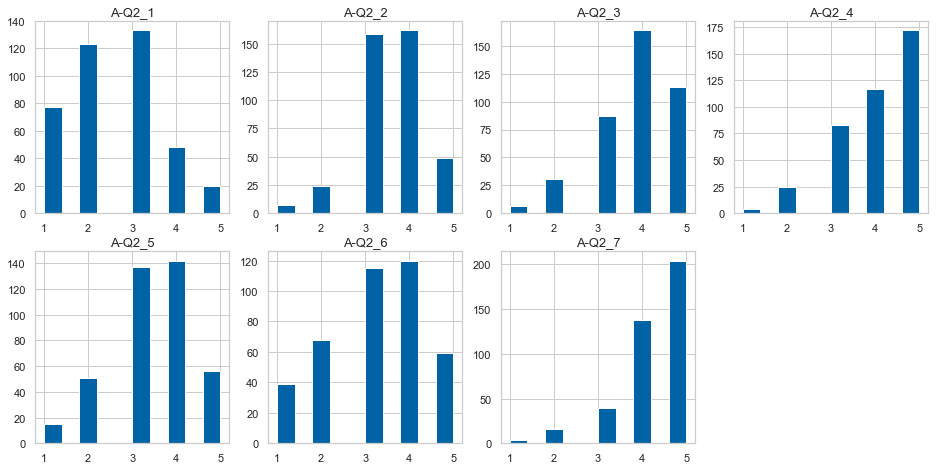

In [37]:
graf_hist(Daten,Liste_A_Q2,16,12,3,4)

In [38]:
Daten[Liste_A_Q2].mean().sort_values(ascending = False)

A-Q2_7    4.301746
A-Q2_4    4.067332
A-Q2_3    3.865337
A-Q2_2    3.553616
A-Q2_5    3.431421
A-Q2_6    3.229426
A-Q2_1    2.528678
dtype: float64

##### Übersicht über Häufigkeit der gewählten Antwortoptionen

In [39]:
AQ2_Lk = Daten[Liste_A_Q2].T.apply(pd.value_counts).fillna(0).astype(integer)
AQ2_Lk = AQ2_Lk.T

In [40]:
AQ2_Lk.describe()

,1,2,3,4,5
count,401.000000,401.000000,401.000000,401.000000,401.000000
mean,0.379052,0.842893,1.877805,2.221945,1.678304
std,0.592419,0.841282,1.160832,1.266143,1.228313
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,2.000000,2.000000,2.000000
75%,1.000000,1.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,7.000000,6.000000,6.000000


##### Score

In [41]:
Score_A2 = []
for i in Daten.index:
    Score_A2.append(sum(Daten[Liste_A_Q2].loc[i]))

In [42]:
Daten['Score_A2'] = Score_A2

In [43]:
Daten['Score_A2'].describe()

count    401.000000
mean      24.977556
std        3.064636
min       15.000000
25%       23.000000
50%       25.000000
75%       27.000000
max       34.000000
Name: Score_A2, dtype: float64

##### Korrelation in A-Q2

In [44]:
df_spearman(Daten,Liste_A_Q2)

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
A-Q2_1,1,0.297221,0.0690837,0.0545192,-0.0723705,-0.0595766,-0.112656
A-Q2_2,0.297221,1,0.263749,0.17788,-0.0133953,-0.0910972,-0.179569
A-Q2_3,0.0690837,0.263749,1,0.497669,-0.0826049,-0.161562,0.0951848
A-Q2_4,0.0545192,0.17788,0.497669,1,-0.0562487,-0.112454,0.0580161
A-Q2_5,-0.0723705,-0.0133953,-0.0826049,-0.0562487,1,0.476382,0.0974701
A-Q2_6,-0.0595766,-0.0910972,-0.161562,-0.112454,0.476382,1,0.0994108
A-Q2_7,-0.112656,-0.179569,0.0951848,0.0580161,0.0974701,0.0994108,1


In [45]:
df_spearman_pv(Daten,Liste_A_Q2)

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
A-Q2_1,0,1.27122e-09,0.167361,0.276089,0.148011,0.233907,0.0240661
A-Q2_2,1.27122e-09,0,8.30887e-08,0.000344237,0.78915,0.0684071,0.000301451
A-Q2_3,0.167361,8.30887e-08,0,1.75365e-26,0.098571,0.00116825,0.0568517
A-Q2_4,0.276089,0.000344237,1.75365e-26,0,0.261118,0.0243219,0.246407
A-Q2_5,0.148011,0.78915,0.098571,0.261118,0,4.15142e-24,0.0511296
A-Q2_6,0.233907,0.0684071,0.00116825,0.0243219,4.15142e-24,0,0.0466553
A-Q2_7,0.0240661,0.000301451,0.0568517,0.246407,0.0511296,0.0466553,0


#### Analyse des individuellen Antwortverhaltens

##### Biplot und Cluster-Analyse

In [46]:
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Daten[Liste_A_Q2])
    Sum_of_squared_distances.append(km.inertia_)

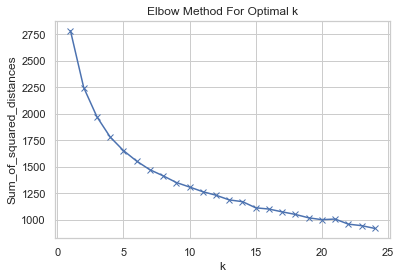

In [47]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [48]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

Silhouette = []
K = range(2,25)
for k in K:
    kmeans_model = AgglomerativeClustering(n_clusters=k).fit(Daten[Liste_A_Q2])
    labels = kmeans_model.labels_
    sil_score = metrics.silhouette_score(Daten[Liste_A_Q2], labels, metric='euclidean')
    Silhouette.append(sil_score)

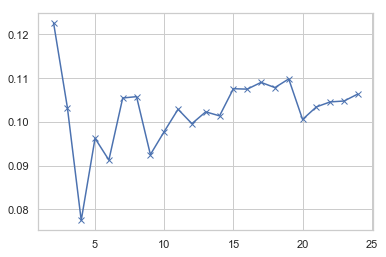

In [49]:
plt.plot(K, Silhouette, 'bx-')

In [50]:
CL = AgglomerativeClustering(n_clusters=8).fit(Daten[Liste_A_Q2])
CL.labels_ = CL.labels_+1

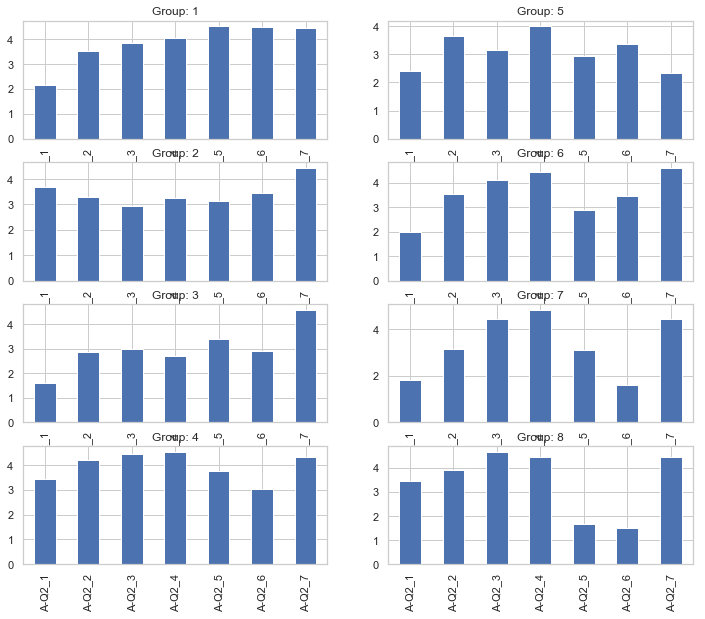

In [51]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (12,10))
i=1
for col in range(2):
    for row in range(4):
        Daten[Liste_A_Q2].loc[CL.labels_ == i,:].mean().plot(kind='bar',
                                                 ax=axes[row,col], 
                                                 title = 'Group: {}'.format(i))
        i+=1

plt.show()

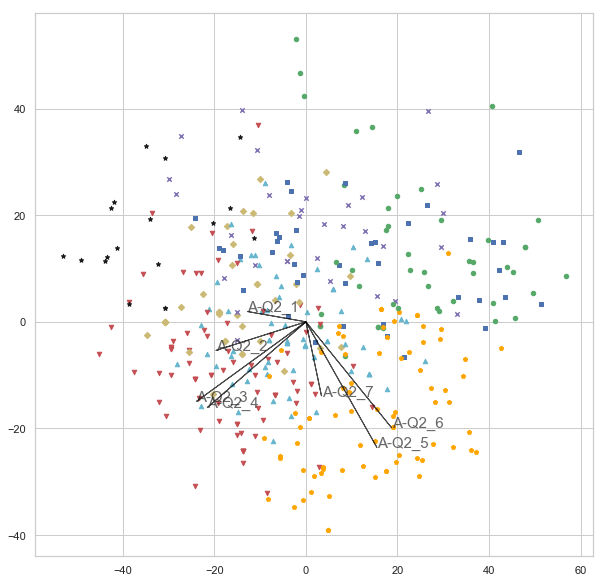

In [52]:
graf_cplot(Daten[Liste_A_Q2],6,8)

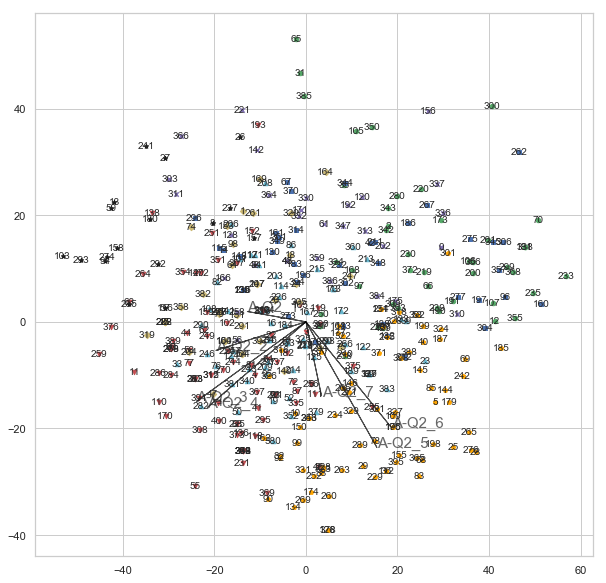

In [53]:
graf_cplot_text(Daten[Liste_A_Q2],6,8)

In [54]:
print(Daten[Liste_A_Q2].loc[CL.labels_ == 1].shape)
print(Daten[Liste_A_Q2].loc[CL.labels_ == 2].shape)
print(Daten[Liste_A_Q2].loc[CL.labels_ == 3].shape)
print(Daten[Liste_A_Q2].loc[CL.labels_ == 4].shape)
print(Daten[Liste_A_Q2].loc[CL.labels_ == 5].shape)
print(Daten[Liste_A_Q2].loc[CL.labels_ == 6].shape)
print(Daten[Liste_A_Q2].loc[CL.labels_ == 7].shape)
print(Daten[Liste_A_Q2].loc[CL.labels_ == 8].shape)

(78, 7)
(41, 7)
(46, 7)
(81, 7)
(31, 7)
(67, 7)
(39, 7)
(18, 7)


In [55]:
Daten[Liste_A_Q2].loc[CL.labels_ == 1].tail() #gelb, unten rechts

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
378,1,4,5,5,5,5,5
388,3,4,2,4,5,4,4
392,1,4,3,3,4,4,4
395,1,3,4,5,5,5,4
398,1,4,3,4,5,4,3


In [56]:
Daten[Liste_A_Q2].loc[265]

A-Q2_1    1
A-Q2_2    3
A-Q2_3    4
A-Q2_4    3
A-Q2_5    5
A-Q2_6    5
A-Q2_7    5
Name: 265, dtype: int64

In [57]:
Daten[Liste_A_Q2].loc[CL.labels_ == 2].tail() #blaue Kästchen

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
349,3,3,3,5,2,3,4
357,3,3,1,3,4,4,5
361,3,4,2,5,3,2,4
370,4,4,3,3,2,3,4
394,3,3,4,4,3,3,4


In [58]:
Daten[Liste_A_Q2].loc[186]

A-Q2_1    4
A-Q2_2    3
A-Q2_3    3
A-Q2_4    2
A-Q2_5    3
A-Q2_6    4
A-Q2_7    4
Name: 186, dtype: int64

In [59]:
Daten[Liste_A_Q2].loc[CL.labels_ == 3].tail() #grüne Punkte

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
368,2,3,2,2,4,4,5
372,2,3,3,3,4,3,4
385,2,3,4,2,2,1,3
387,2,3,4,4,4,2,5
393,3,3,3,3,5,2,5


In [60]:
Daten[Liste_A_Q2].loc[170]

A-Q2_1    5
A-Q2_2    5
A-Q2_3    5
A-Q2_4    5
A-Q2_5    3
A-Q2_6    5
A-Q2_7    4
Name: 170, dtype: int64

In [61]:
Daten[Liste_A_Q2].loc[CL.labels_ == 4].tail() #rot, links unten

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
390,3,3,4,4,4,3,4
391,5,5,5,4,4,4,4
396,3,3,4,5,3,3,4
399,3,4,5,5,4,4,5
400,3,4,5,5,4,3,5


In [62]:
Daten[Liste_A_Q2].loc[70]

A-Q2_1    1
A-Q2_2    2
A-Q2_3    3
A-Q2_4    1
A-Q2_5    3
A-Q2_6    4
A-Q2_7    5
Name: 70, dtype: int64

In [63]:
Daten[Liste_A_Q2].loc[CL.labels_ == 5].tail() #lila Kreuze

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
359,1,5,2,5,3,4,2
364,3,4,3,4,2,3,3
366,3,4,3,5,2,1,2
384,4,3,3,4,4,5,2
386,2,4,4,3,4,3,3


In [64]:
Daten[Liste_A_Q2].loc[CL.labels_ == 6].tail() #hellblaue Dreiecke

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
360,1,3,3,4,2,3,5
379,1,5,4,4,4,4,5
380,1,4,5,5,5,3,4
381,2,4,5,5,3,4,4
383,1,3,4,4,4,4,5


In [65]:
Daten[Liste_A_Q2].loc[122]

A-Q2_1    1
A-Q2_2    3
A-Q2_3    4
A-Q2_4    4
A-Q2_5    3
A-Q2_6    4
A-Q2_7    5
Name: 122, dtype: int64

In [66]:
Daten[Liste_A_Q2].loc[CL.labels_ == 7].tail() #beige Rhomben, oben links

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
319,2,5,5,5,3,2,4
320,1,4,2,5,3,1,4
358,1,5,5,4,3,1,5
382,2,4,4,5,3,1,5
397,2,2,5,5,4,1,5


In [67]:
Daten[Liste_A_Q2].loc[CL.labels_ == 8].tail() #schwarze Sterne

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
241,4,4,4,4,1,1,4
274,4,5,4,5,2,1,5
285,4,4,5,5,2,2,5
292,4,3,5,5,2,2,4
293,3,5,5,5,2,1,4


In [68]:
Daten[Liste_A_Q2].loc[180]

A-Q2_1    3
A-Q2_2    4
A-Q2_3    5
A-Q2_4    4
A-Q2_5    2
A-Q2_6    1
A-Q2_7    4
Name: 180, dtype: int64

### A-Q3 (31 Einzelstrategien)

1	Ich vergleiche unbekannte deutsche Wörter mit gleich oder ähnlich geschriebenen Wörtern in meiner Muttersprache.

2	Ich vergleiche unbekannte deutsche Wörter mit gleich oder ähnlich geschriebenen Wörtern in Englisch.
z.B. dt. Licht - engl. light (span. luz).

3	Ich vergleiche unbekannte deutsche Wörter mit gleich oder ähnlich geschriebenen Wörtern in einer anderen Sprache.

4	Ich spreche mir unbekannte deutsche Wörter leise vor oder stelle mir ihren Klang vor, um gleich oder ähnlich klingende Wörter in meiner Muttersprache oder einer anderen Sprache zu finden.
z.B. dt. Haus - engl. house (span. casa).

5	Ich nutze mein Wissen über Lautentsprechungen zwischen Deutsch und anderen (germanischen) Sprachen und/oder über die historische Entwicklung der deutschen Sprache. 
z.B. engl. d - dt. t: garden – Garten (jardín), day - Tag (día), p – f: hope – hoffen (esperar), sheep - Schaf (oveja), ship - Schiff (barco)

6	Ich nutze mein Wissen über die Wortbildungsregeln des Deutschen (z.B. Komposita, typische Endungen für bestimmte Wortarten). 
z.B. fahren = Verb (Tätigkeit), der Fahrer = Person, die fährt (allgemein/männlich), die Fahrerin = Person, die fährt (weiblich), der Autofahrer = Auto + Fahrer = Fahrer eines Autos. 

7	Ich nutze mein Wissen über die Teilbedeutung zusammengesetzter Wörter, z.B. Stamm, Prä- und Suffixe oder Teile von Komposita, um die Gesamtbedeutung zu erschließen. 
z.B. Mopedfahrer -> erstes Teilwort ist ein Fahrzeug, ungenau -> Präfix un- bedeutet oft „Gegenteil“, genau -> ungenau. 

8	Ich nutze mein Wissen über Bestandteile von Wörtern, die grammatische Funktionen anzeigen, z.B. Plural- oder Kasusmarkierungen für Substantive, typische Endungen von Verben in verschiedenen Zeitformen/Tempora. 
z.B. gefahren, gelernt -> Partizipien (Wortart: Verb); schöner, reicher -> Steigerungsform Komparativ (Wortart Adjektiv).

9	Ich nutze mein Wissen über orthografische Regeln des Deutschen, z.B. Großschreibung der Substantive, Bindestriche in zusammengesetzten Wörtern, Punkt oder Komma als Strukturierungshilfen.

28	Wenn ich denke, dass ich ein unbekanntes Wort aufgrund seiner Form oder seines Klanges verstehen kann, kontrolliere ich meine Vermutung, indem ich den näheren Kontext (d. h. den Satz oder Teilsatz) miteinbeziehe.

10	Ich nutze mein Wissen über die Satzstellung im Deutschen, z.B. Personalform des Verbes an zweiter Position im Satz, Verbal/Satzklammer etc., um etwas über unbekannte Wörter herauszufinden.

11	Ich analysiere den grammatikalischen Aufbau des (Teil-)Satzes, um Verbindungen zwischen bekannten und unbekannten Wörtern zu finden.

12	Ich analysiere die semantischen Beziehungen zwischen bekannten und unbekannten Wörtern.

13	Ich beachte systematische lexikalische Beziehungen wie Synonyme, Antonyme, Reihungen, Über- und Unterbegriffe.

29	Wenn ich denke, dass ich ein unbekanntes Wort in einem (Teil-)Satz verstehen kann, kontrolliere ich meine Vermutung, indem ich den weiteren Kontext (d.h. vorherige und folgende Sätze, Absatz, Gesamttext) miteinbeziehe.

14	Ich beachte die Verwendung von Konnektoren und anderen Mitteln der Textverbindung wie Pronomen, Adverbien etc. 
z.B. weil, auch, diese

15	Ich nutze Erklärungshilfen im Text wie Paraphrasen, Definitionen, Erklärungen, Beispiele etc., die das unbekannte Wort umschreiben oder erklären.

16	Ich nutze logische Zusammenhänge im Text, z.B. Ursache – Wirkung oder vorher – nachher.

17	Ich nutze mein Wissen über die Textsorte.

18	Ich nutze mein Wissen über das im Text behandelte Thema.

19	Ich nutze kulturspezifisches und landeskundliches Wissen, z.B. Namen berühmter Persönlichkeiten, geographische oder politische Informationen.

20	Ich nutze meinen gesunden Menschenverstand und mein allgemeines Weltwissen.

21	Ich achte auf die visuelle Textgestalt, z.B. Anordnung der Elemente, Schriftart und –größe, Hervorhebungen.

22	Ich nutze Bilder, Grafiken, Diagramme, audiovisuelle Elemente (auf Websites), etc.

23	Ich achte auf Zahlen oder andere Zeichen, die ich verstehe.

24	Ich nutze mein Wissen über die Kommunikationssituation oder den Kontext der Veröffentlichung, z.B. Ort, Zeit, Situation, wo ich einen Text gefunden habe.

25	Ich nutze Hyperlinks beim Erschließen von unbekannten Wörtern in Texten im Internet.

30	Wenn es mir nicht gelingt, ein unbekanntes Wort in einem Text zu erschließen, lese ich zunächst weiter und versuche es später noch einmal.

31	Wenn es mir nicht sofort gelingt, eine sinnvolle Wortbedeutung zu erschließen, überlege ich, welche weiteren Strategien ich anwenden kann.

26	Ich nutze verschiedene Strategien, um die Erschließung unbekannter Wörter abzusichern.

27	Je nach Situation, z.B. Textsorte oder Schwierigkeitsgrad der Texte, wende ich unterschiedliche Strategien zur Erschließung unbekannter Wörter an.


In [75]:
df_describe(Daten_A3[Daten_A3[Liste_A_Q3]!=0],Liste_A_Q3)

,count,mean,std,min,25%,50%,75%,max,mode,median,kurtosis,skew
A-Q3_1,396.0,3.055556,1.208386,1.0,2.00,3.0,4.0,5.0,3.0,3.0,-0.843564,-0.106998
A-Q3_2,395.0,3.977215,0.943580,1.0,3.00,4.0,5.0,5.0,4.0,4.0,0.069314,-0.756139
A-Q3_3,394.0,2.992386,1.327893,1.0,2.00,3.0,4.0,5.0,3.0,3.0,-1.114192,-0.130166
A-Q3_4,396.0,2.924242,1.183994,1.0,2.00,3.0,4.0,5.0,3.0,3.0,-0.854739,-0.036763
A-Q3_5,396.0,2.575758,1.237318,1.0,2.00,2.0,4.0,5.0,2.0,2.0,-1.036283,0.276562
A-Q3_6,396.0,3.747475,1.087032,1.0,3.00,4.0,5.0,5.0,4.0,4.0,-0.198458,-0.685463
A-Q3_7,396.0,3.568182,1.146441,1.0,3.00,4.0,4.0,5.0,4.0,4.0,-0.613826,-0.456901
A-Q3_8,396.0,3.633838,1.166957,1.0,3.00,4.0,5.0,5.0,4.0,4.0,-0.526970,-0.571100
A-Q3_9,396.0,3.957071,1.048531,1.0,3.00,4.0,5.0,5.0,5.0,4.0,-0.071585,-0.801331
A-Q3_28,396.0,3.792929,1.044601,1.0,3.00,4.0,5.0,5.0,4.0,4.0,-0.219835,-0.608811


In [76]:
df_describe(Daten_A3[Daten_A3[Liste_A_Q3]!=0],Liste_A_Q3).to_excel('D:\Daten\DISS\Daten\Deskriptiv_A3.xlsx')

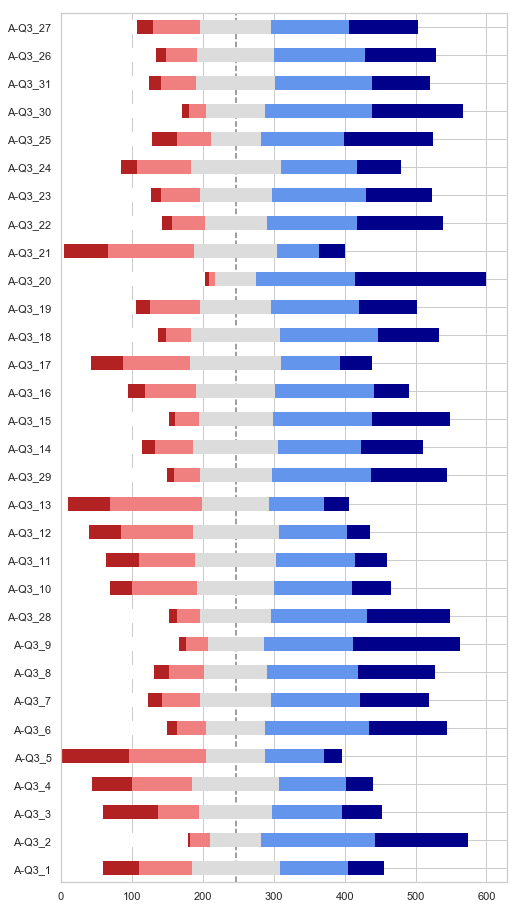

In [106]:
graf_likert(Daten_A3,Liste_A_Q3,16)

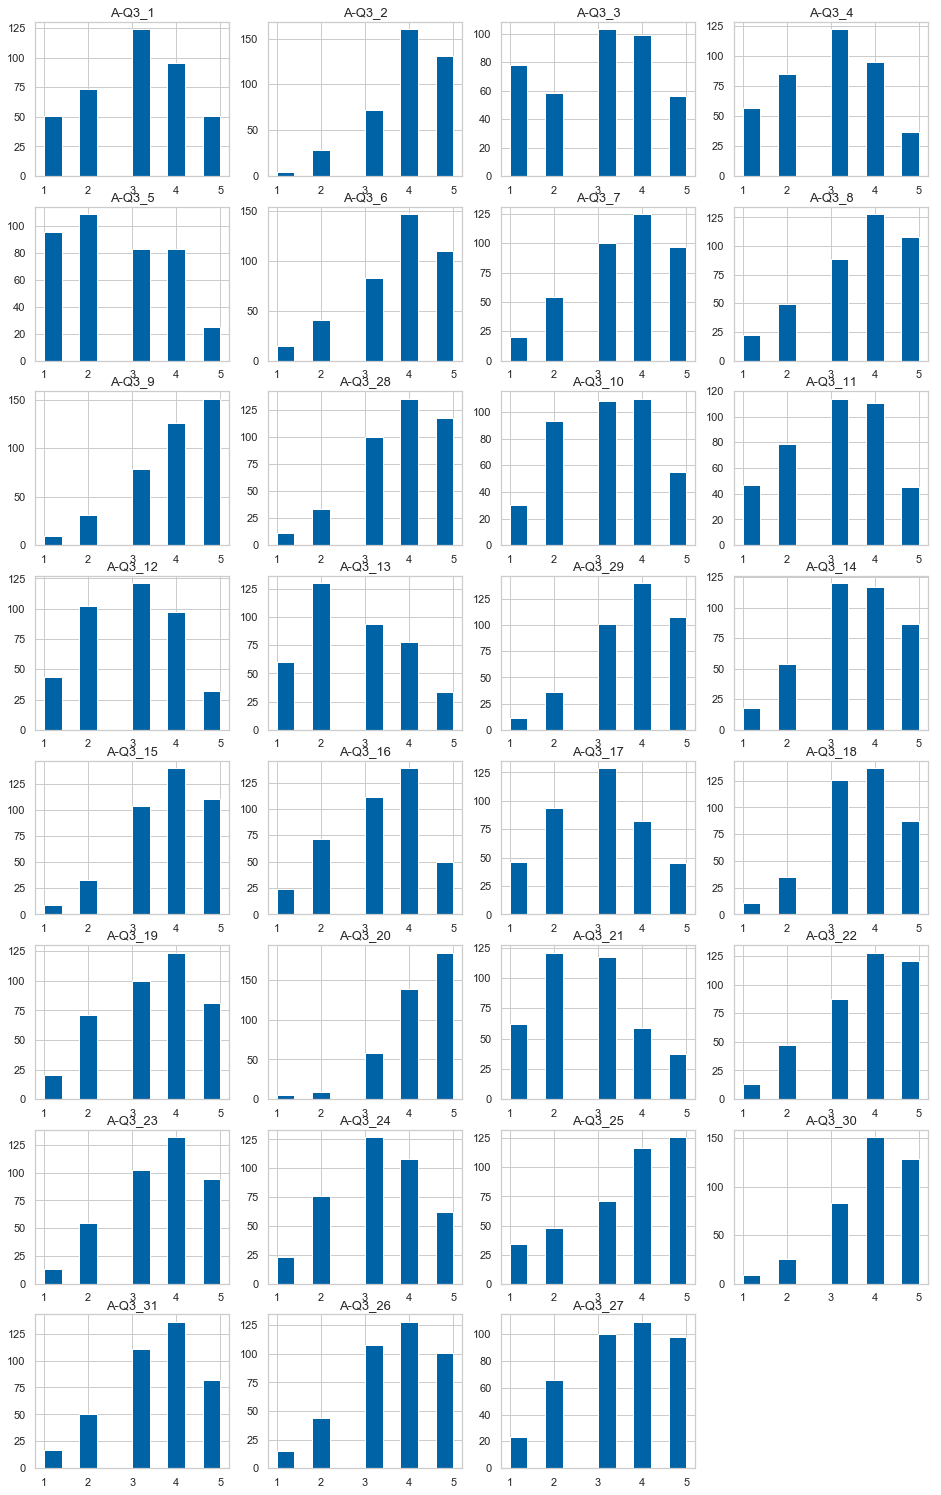

In [107]:
graf_hist(Daten_A3,Liste_A_Q3,16,30,9,4)

In [108]:
Daten_A3[Liste_A_Q3].mean().sort_values(ascending = False)

A-Q3_20    4.237374
A-Q3_2     3.967172
A-Q3_9     3.957071
A-Q3_30    3.919192
A-Q3_28    3.792929
A-Q3_15    3.780303
A-Q3_29    3.752525
A-Q3_22    3.750000
A-Q3_6     3.747475
A-Q3_26    3.646465
A-Q3_18    3.641414
A-Q3_25    3.638889
A-Q3_8     3.633838
A-Q3_23    3.603535
A-Q3_7     3.568182
A-Q3_31    3.545455
A-Q3_14    3.507576
A-Q3_27    3.487374
A-Q3_19    3.441919
A-Q3_16    3.300505
A-Q3_24    3.277778
A-Q3_10    3.169192
A-Q3_11    3.070707
A-Q3_1     3.055556
A-Q3_3     2.977273
A-Q3_17    2.964646
A-Q3_12    2.926768
A-Q3_4     2.924242
A-Q3_13    2.737374
A-Q3_21    2.717172
A-Q3_5     2.575758
dtype: float64

In [109]:
Daten_A3[Liste_A_Q3].std().sort_values()

A-Q3_20    0.873936
A-Q3_2     0.963345
A-Q3_30    0.992904
A-Q3_18    1.007668
A-Q3_15    1.016181
A-Q3_29    1.040627
A-Q3_28    1.044601
A-Q3_9     1.048531
A-Q3_31    1.084041
A-Q3_6     1.087032
A-Q3_26    1.091399
A-Q3_23    1.091689
A-Q3_16    1.092251
A-Q3_22    1.111790
A-Q3_14    1.112617
A-Q3_24    1.117688
A-Q3_12    1.126073
A-Q3_7     1.146441
A-Q3_19    1.149204
A-Q3_10    1.160166
A-Q3_8     1.166957
A-Q3_17    1.168690
A-Q3_21    1.173897
A-Q3_4     1.183994
A-Q3_11    1.186443
A-Q3_13    1.187154
A-Q3_27    1.195918
A-Q3_1     1.208386
A-Q3_5     1.237318
A-Q3_25    1.276230
A-Q3_3     1.341448
dtype: float64

In [110]:
Daten_A3[Daten_A3['A-Q3_3_TEXT']!=0]['A-Q3_3'].describe()

count    272.000000
mean       3.584559
std        0.994552
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: A-Q3_3, dtype: float64

In [111]:
Daten_A3[Daten_A3['A-Q3_3_TEXT']!=0]['A-Q3_3'].median()

4.0

In [112]:
Daten_A3['A-Q3_3_TEXT'].value_counts()

0                                        124
Francés                                   24
Inglés                                    24
Inglés                                    21
francés                                   18
inglés                                    17
Francés                                    7
Inglés, francés                            4
latín                                      4
inglés, francés                            4
neerlandés                                 4
español                                    3
Español                                    3
Inglés, neerlandés                         2
inglés                                     2
inglés y francés                           2
esperanto                                  2
Neerlandés                                 2
Inglés, latín                              2
Inglés, español                            2
inglés, castellano                         2
Inglés, francés, español                   2
Neerlandés

##### Score

In [104]:
Score = []
for i in Daten_A3.index:
    Score.append(sum(Daten_A3[Liste_A_Q3].loc[i]))
Df_Score = pd.DataFrame(Score)
Df_Score.describe()

,0
count,396.000000
mean,106.315657
std,16.475954
min,50.000000
25%,95.000000
50%,107.000000
75%,117.000000
max,151.000000


In [105]:
print('Maximal-Score: ' + str(+31*5))
print('Minimal-Score: ' + str(+31*1))

Maximal-Score: 155
Minimal-Score: 31


##### Korrelation in A-Q3

In [77]:
df_spearman(Daten_A3[Daten_A3[Liste_A_Q3]!=0],Liste_A_Q3)

,A-Q3_1,A-Q3_2,A-Q3_3,A-Q3_4,A-Q3_5,A-Q3_6,A-Q3_7,A-Q3_8,A-Q3_9,A-Q3_28,A-Q3_10,A-Q3_11,A-Q3_12,A-Q3_13,A-Q3_29,A-Q3_14,A-Q3_15,A-Q3_16,A-Q3_17,A-Q3_18,A-Q3_19,A-Q3_20,A-Q3_21,A-Q3_22,A-Q3_23,A-Q3_24,A-Q3_25,A-Q3_30,A-Q3_31,A-Q3_26,A-Q3_27
A-Q3_1,1,0.346847,0.279367,0.166701,0.220069,0.0337875,0.0161208,-0.00669981,0.0243783,0.0395947,0.0573194,0.0940567,0.058144,0.0955602,-0.0255853,-0.051236,-0.0354504,-0.0641632,0.148989,0.136043,0.123264,0.157107,0.0248442,0.0395996,0.0104819,0.0620328,0.0197387,0.0389656,0.0664842,0.123348,0.0256054
A-Q3_2,0.346847,1,0.349614,0.308664,0.265458,0.174083,0.140337,0.0757999,0.0896335,0.167453,-0.00497755,-0.0124465,0.0245256,-0.0561847,0.0847654,0.0342442,0.119854,0.0409649,0.094595,0.151263,0.219081,0.213189,-0.0141254,0.115418,0.0701514,0.16565,0.0707783,0.14855,0.0578711,0.235132,0.131205
A-Q3_3,0.279367,0.349614,1,0.265633,0.182263,0.0378069,0.0303668,-0.0145613,0.0498522,0.100778,-0.0436054,-0.00431746,0.0345578,0.0640008,0.00270939,0.0463312,0.0621203,0.0228195,0.133485,0.160682,0.151341,0.113014,0.0929999,0.119682,0.0831185,0.183052,0.0213186,0.012851,0.109581,0.162459,0.116165
A-Q3_4,0.166701,0.308664,0.265633,1,0.307871,0.0567176,0.0502776,-0.00841426,0.0710265,0.104351,0.0256198,0.104125,0.0573884,0.066428,0.0630339,0.0372142,0.0522034,0.0717937,0.104685,0.041392,0.096537,0.0605934,0.178997,0.150228,0.135397,0.136298,0.0926327,0.132906,0.0851411,0.132624,0.17509
A-Q3_5,0.220069,0.265458,0.182263,0.307871,1,0.291238,0.233821,0.18494,0.188803,0.17785,0.212696,0.241171,0.258153,0.241825,0.168085,0.168539,0.180525,0.14692,0.242267,0.151274,0.146488,0.15293,0.220332,0.0695692,0.105244,0.185723,0.110238,0.0876866,0.112481,0.188459,0.183307
A-Q3_6,0.0337875,0.174083,0.0378069,0.0567176,0.291238,1,0.737657,0.661202,0.438167,0.276135,0.386187,0.317755,0.32235,0.226408,0.241582,0.363465,0.302011,0.212501,0.158239,0.243998,0.184143,0.289189,0.0860539,0.0516796,0.100234,0.142201,0.0667649,0.198565,0.063428,0.209874,0.172499
A-Q3_7,0.0161208,0.140337,0.0303668,0.0502776,0.233821,0.737657,1,0.726109,0.444737,0.279572,0.423745,0.350942,0.365161,0.234585,0.253354,0.382477,0.342429,0.282349,0.200718,0.255576,0.21523,0.280157,0.109363,0.0927679,0.102082,0.133425,0.102873,0.222618,0.143425,0.253245,0.168487
A-Q3_8,-0.00669981,0.0757999,-0.0145613,-0.00841426,0.18494,0.661202,0.726109,1,0.549249,0.287427,0.432728,0.356097,0.318331,0.230993,0.27295,0.389849,0.318833,0.282339,0.172293,0.225378,0.243938,0.292441,0.154521,0.0900005,0.127939,0.178386,0.0865667,0.232252,0.115896,0.217156,0.199644
A-Q3_9,0.0243783,0.0896335,0.0498522,0.0710265,0.188803,0.438167,0.444737,0.549249,1,0.262869,0.381281,0.271858,0.268713,0.156685,0.248749,0.313081,0.361911,0.164462,0.147455,0.178841,0.252349,0.239368,0.1439,0.0753176,0.165305,0.153026,0.0907744,0.211332,0.14378,0.195566,0.194203
A-Q3_28,0.0395947,0.167453,0.100778,0.104351,0.17785,0.276135,0.279572,0.287427,0.262869,1,0.279265,0.272416,0.336143,0.192257,0.436824,0.240992,0.269768,0.246818,0.166513,0.303714,0.24008,0.358257,0.0416532,0.182965,0.193314,0.191954,0.0576555,0.214086,0.289454,0.347838,0.189267


In [78]:
df_spearman_pv(Daten_A3[Daten_A3[Liste_A_Q3]!=0],Liste_A_Q3)

,A-Q3_1,A-Q3_2,A-Q3_3,A-Q3_4,A-Q3_5,A-Q3_6,A-Q3_7,A-Q3_8,A-Q3_9,A-Q3_28,A-Q3_10,A-Q3_11,A-Q3_12,A-Q3_13,A-Q3_29,A-Q3_14,A-Q3_15,A-Q3_16,A-Q3_17,A-Q3_18,A-Q3_19,A-Q3_20,A-Q3_21,A-Q3_22,A-Q3_23,A-Q3_24,A-Q3_25,A-Q3_30,A-Q3_31,A-Q3_26,A-Q3_27
A-Q3_1,0,1.67621e-12,2.33043e-08,0.000867966,9.88053e-06,0.502584,0.749115,0.894269,0.628627,0.432018,0.255133,0.0614929,0.248348,0.0574381,0.611724,0.30914,0.481778,0.202625,0.002958,0.00670261,0.0141063,0.00171273,0.622079,0.431961,0.835282,0.218053,0.69536,0.439375,0.186736,0.0140408,0.611444
A-Q3_2,1.67621e-12,0,2.90926e-13,2.22701e-10,7.34919e-08,0.000928968,0.00650109,0.127896,0.0951563,0.000573416,0.802611,0.69662,0.622592,0.281391,0.0902013,0.471298,0.0168051,0.440794,0.0496123,0.00175273,6.63636e-06,1.3658e-05,0.809754,0.0319647,0.186108,0.000769126,0.130764,0.00222452,0.28104,2.14381e-06,0.00645885
A-Q3_3,2.33043e-08,2.90926e-13,0,4.74888e-08,0.000300391,0.50078,0.50943,0.879893,0.326238,0.0350116,0.293917,0.914023,0.434434,0.193125,0.933441,0.407294,0.232119,0.76208,0.012654,0.00114333,0.00155608,0.0233197,0.103789,0.0197061,0.0907133,0.000493715,0.777618,0.808749,0.0325289,0.00151194,0.0145353
A-Q3_4,0.000867966,2.22701e-10,4.74888e-08,0,3.85268e-10,0.260163,0.318289,0.867437,0.158326,0.0379252,0.611244,0.0383457,0.25456,0.187109,0.210702,0.46023,0.300082,0.153868,0.0373101,0.411397,0.0549242,0.228942,0.000343997,0.00272578,0.00696967,0.00659941,0.0655482,0.00809214,0.0906452,0.00822915,0.000464715
A-Q3_5,9.88053e-06,7.34919e-08,0.000300391,3.85268e-10,0,3.5107e-09,2.55577e-06,0.000215098,0.000157274,0.000376009,1.97102e-05,1.19818e-06,1.89357e-07,1.11879e-06,0.000784508,0.000758811,0.000305317,0.00338581,1.06802e-06,0.00254293,0.00348193,0.00227606,9.63555e-06,0.167062,0.0363016,0.000201974,0.0282746,0.0813714,0.0251962,0.000161756,0.000245077
A-Q3_6,0.502584,0.000928968,0.50078,0.260163,3.5107e-09,0,3.35214e-69,4.01637e-51,5.234e-20,2.31512e-08,1.55977e-15,9.68747e-11,5.01087e-11,5.35303e-06,1.14765e-06,8.2102e-14,8.52785e-10,2.0067e-05,0.00158378,8.89494e-07,0.000229264,4.56413e-09,0.087227,0.304964,0.0462224,0.0045791,0.184878,6.93266e-05,0.207857,2.55125e-05,0.000565337
A-Q3_7,0.749115,0.00650109,0.50943,0.318289,2.55577e-06,3.35214e-69,0,4.43769e-66,1.2476e-20,1.522e-08,1.09446e-18,6.40487e-13,6.17332e-14,2.36496e-06,3.23289e-07,3.0439e-15,2.45897e-12,1.08002e-08,5.75552e-05,2.52696e-07,1.5587e-05,1.4163e-08,0.0295585,0.0651539,0.0423267,0.00784603,0.0407451,7.73876e-06,0.00423785,3.2718e-07,0.000761719
A-Q3_8,0.894269,0.127896,0.879893,0.867437,0.000215098,4.01637e-51,4.43769e-66,0,1.38373e-32,5.71075e-09,1.67578e-19,2.7796e-13,8.92519e-11,3.3986e-06,3.39725e-08,7.99562e-16,8.3078e-11,1.08132e-08,0.000574169,5.92118e-06,8.95193e-07,3.00595e-09,0.00204404,0.0736217,0.010822,0.000360731,0.0853523,2.99494e-06,0.0210664,1.30163e-05,6.31662e-05
A-Q3_9,0.628627,0.0951563,0.326238,0.158326,0.000157274,5.234e-20,1.2476e-20,1.38373e-32,0,1.10759e-07,3.7691e-15,3.87039e-08,5.6156e-08,0.00176311,5.34753e-07,1.87301e-10,1.06474e-13,0.00102053,0.00327012,0.000348196,3.61116e-07,1.44622e-06,0.00411156,0.134604,0.000960445,0.00226144,0.071168,2.23384e-05,0.00414322,8.95477e-05,0.000100462
A-Q3_28,0.432018,0.000573416,0.0350116,0.0379252,0.000376009,2.31512e-08,1.522e-08,5.71075e-09,1.10759e-07,0,1.58048e-08,3.621e-08,6.46924e-12,0.000118236,6.98933e-20,1.22091e-06,4.95956e-08,6.58438e-07,0.000879916,6.78148e-10,1.34285e-06,1.95065e-13,0.408448,0.000251819,0.000108247,0.000121258,0.252352,1.73351e-05,4.41236e-09,1.05083e-12,0.000151397


##### Scores nach Faktoren

Mit den Faktorenladungen der in R durchgeführten Faktorenanalyse können Scores für die jeweiligen Faktoren ermittelt werden. Dabei werden die Werte der gewählten Antwortoptionen (1-5) mit den jeweiligen Ladungen der Items auf die betreffenen Faktoren multipliziert. ...?

In [79]:
FA_weights = pd.read_excel('D:\Daten\DISS\Daten\FA_weights.xlsx')

A = FA_weights.drop(FA_weights.columns[0], axis=1).values
B = Daten_A3[Liste_A_Q3].values
C = B.dot(A)
Df_C = pd.DataFrame(C, columns=FA_weights.columns[1:], index=Daten_A3[Liste_A_Q3].index)

Df_C.describe().T

,count,mean,std,min,25%,50%,75%,max
MR2,396.0,3.253724,1.035254,0.209622,2.587469,3.371243,4.080865,5.196618
MR4,396.0,1.771732,1.014218,-0.885364,1.121201,1.864604,2.440983,4.612436
MR1,396.0,2.054398,0.908293,-1.604625,1.545188,2.111798,2.627530,4.025577
MR5,396.0,3.482871,0.893274,0.142993,2.875799,3.513703,4.147824,5.704204
MR6,396.0,2.661785,0.965146,0.040507,2.004147,2.738965,3.361351,4.609336
MR3,396.0,3.415453,0.933825,0.669899,2.786605,3.410675,4.061222,5.804806


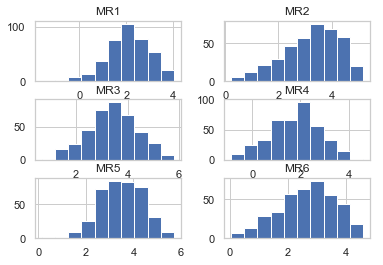

In [80]:
Df_C.hist();

In [81]:
strat = {'S1': ['A-Q3_5','A-Q3_6','A-Q3_7','A-Q3_8','A-Q3_9'], 
         'S2': ['A-Q3_1','A-Q3_2','A-Q3_3','A-Q3_4','A-Q3_5'],
         'S3': ['A-Q3_9','A-Q3_10','A-Q3_11','A-Q3_12'],
         'S4': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16','A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S4a': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16'],
         'S4b': ['A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S5': ['A-Q3_21','A-Q3_22','A-Q3_23','A-Q3_24','A-Q3_25'],
         'S6': ['A-Q3_26','A-Q3_27','A-Q3_28','A-Q3_29','A-Q3_30','A-Q3_31']}

In [119]:
def _func1_(x):
    
    c1 = el[el>=3].count()
    return x.mean(), x.std(), x.kurtosis(), x.skew(), mini, maxi
AQ3_t = Daten[Liste_A_Q3].apply(_func_, axis = 1).fillna(0).apply(pd.Series)
AQ3_t.columns = ['mean','std','kurt','skew', 'freq_min','freq_max']

In [86]:

(Daten_A3[strat['S1']]>=3).sum()
#(Daten_A3[(Daten_A3[strat['S1']] >= 3)

A-Q3_5    191
A-Q3_6    340
A-Q3_7    322
A-Q3_8    325
A-Q3_9    356
dtype: int64

In [85]:
Daten_A3[strat['S1']]

,A-Q3_5,A-Q3_6,A-Q3_7,A-Q3_8,A-Q3_9
0,2,2,4,4,5
1,5,5,5,5,5
2,3,4,3,4,4
3,2,4,4,5,3
4,4,4,3,3,4
5,5,3,3,2,4
6,4,2,4,4,5
7,3,4,5,5,5
8,4,2,2,2,4
9,3,3,4,4,5


#### Biplot und Cluster-Analyse für Frequenz der Item-Wahl

In [117]:
AQ3_Lk = Daten[Liste_A_Q3].T.apply(pd.value_counts).fillna(0).astype(integer)
AQ3_Lk = AQ3_Lk.T
AQ3_Lk.drop(0, axis=1, inplace=True)

In [118]:
AQ3_Lk.describe()

,1,2,3,4,5
count,401.000000,401.000000,401.000000,401.000000,401.000000
mean,2.259352,4.760599,7.867830,9.174564,6.620948
std,2.867502,3.150007,4.341081,4.277786,5.688230
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,5.000000,7.000000,2.000000
50%,1.000000,4.000000,7.000000,9.000000,5.000000
75%,3.000000,7.000000,10.000000,12.000000,10.000000
max,20.000000,16.000000,25.000000,22.000000,27.000000


In [119]:
def _func_(x):
    maximo = x.max()
    minimo = x.min()
    if maximo !=5:
        maxi = 0
    else:
        maxi = x.value_counts()[5]
    if minimo !=1:
        mini = 0
    else:
        mini = x.value_counts()[1]
    return x.mean(), x.std(), x.kurtosis(), x.skew(), mini, maxi
AQ3_t = Daten[Liste_A_Q3].apply(_func_, axis = 1).fillna(0).apply(pd.Series)
AQ3_t.columns = ['mean','std','kurt','skew', 'freq_min','freq_max']

In [120]:
AQ3_t.head()

,mean,std,kurt,skew,freq_min,freq_max
0,3.354839,1.141589,-0.523427,-0.335405,2.0,5.0
1,4.000000,1.000000,3.760591,-1.710345,2.0,9.0
2,3.096774,1.300124,-1.067880,-0.093234,4.0,5.0
3,3.161290,1.368619,-0.558695,-0.477033,0.0,5.0
4,3.580645,0.885972,-0.505686,-0.260716,0.0,4.0


In [121]:
Daten.loc[110,Liste_A_Q3].std()

0.7828813612588127

In [122]:
AQ3_Lk_std = (AQ3_Lk - AQ3_Lk.mean())/AQ3_Lk.std()

In [123]:
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(AQ3_t)
    Sum_of_squared_distances.append(km.inertia_)

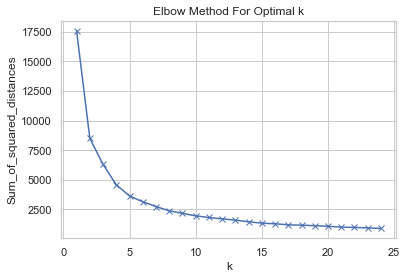

In [124]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [141]:
K = KMeans(n_clusters=5).fit(AQ3_t)

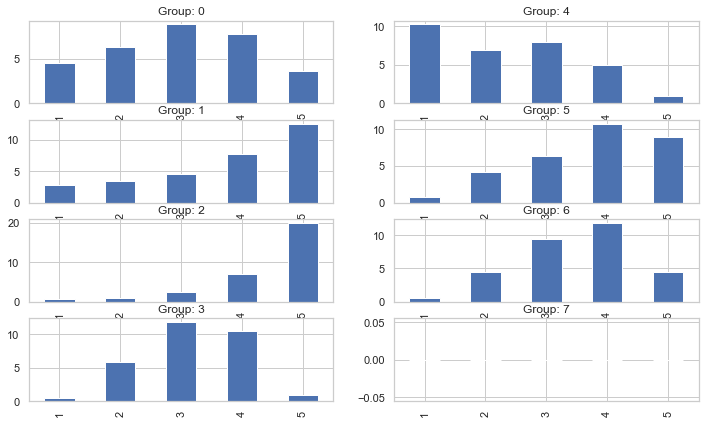

In [139]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (12,7))
i=0
for col in range(2):
    for row in range(4):
        AQ3_Lk.loc[K.labels_ == i,:].mean().plot(kind='bar',
                                                 ax=axes[row,col], 
                                                 title = 'Group: {}'.format(i))
        i+=1

plt.show()

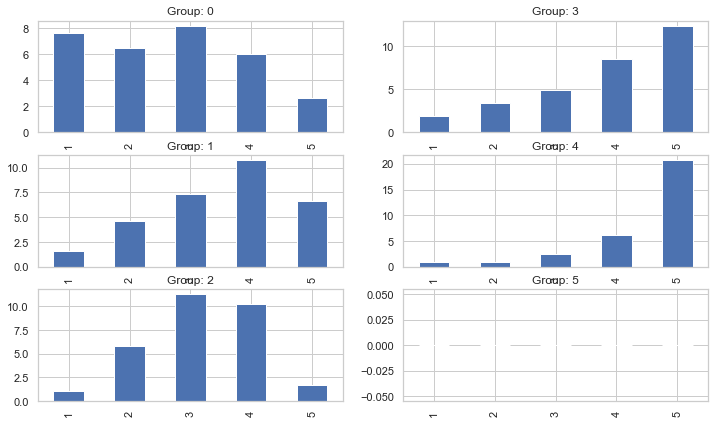

In [142]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (12,7))
i=0
for col in range(2):
    for row in range(3):
        AQ3_Lk.loc[K.labels_ == i,:].mean().plot(kind='bar',
                                                 ax=axes[row,col], 
                                                 title = 'Group: {}'.format(i))
        i+=1

plt.show()

In [126]:
AQ3_Lk.loc[K.labels_ == K.labels_[378],:].tail()

,1,2,3,4,5
359,3,6,4,5,13
373,3,1,6,9,12
378,8,4,2,3,14
392,5,5,4,5,12
397,5,3,7,5,11


In [127]:
K.labels_[378]

3

In [128]:
AQ3_t.loc[K.labels_ == 1,:].tail()

,mean,std,kurt,skew,freq_min,freq_max
370,2.935484,1.093480,-0.623966,-0.028586,3.0,2.0
381,3.258065,1.365473,-1.002116,-0.417598,5.0,6.0
382,3.258065,1.315744,-1.122098,-0.136736,3.0,7.0
396,3.483871,1.121635,-0.154075,-0.638830,2.0,5.0
398,3.419355,1.258946,-0.666833,-0.448314,3.0,7.0


In [129]:
K.labels_[11]

3

In [130]:
def graf_cplot3_text(data,data1, dim, nclust, dim1 = 0, dim2 = 1, sx = 10, sy = 10):
    
    B = biplot.Classic(data, dim, method = 1) 
    R = B.RowCoord
    C = B.ColCoord
    
    K = AgglomerativeClustering(n_clusters=nclust, linkage='ward').fit(data1)
    
    fig = plt.figure(figsize=(sx,sy))
    ax = fig.add_subplot(111)

    sh_v = vector_to_shape(K.labels_)
    color_v = vector_to_color(K.labels_)

    for i in range(C.shape[0]):
        ax.arrow(0,0,C[i,dim1],C[i,dim2], alpha = 0.7, color = 'black')
        #ax.scatter(C[i,dim1],C[i,dim2]) # Hier würden Linien nicht angezeigt.
        ax.text(C[i,dim1],C[i,dim2],data.columns[i],fontsize=15, alpha = 0.7)

    for i in range(R.shape[0]):
        ax.scatter(R[i,dim1],R[i,dim2], s = 20, c = color_v[i] , marker = sh_v[i])
    
    texts = [plt.text(R[i,dim1],R[i,dim2], data.index[i], ha='center', va='center') for i in range(len(R[:,0]))];

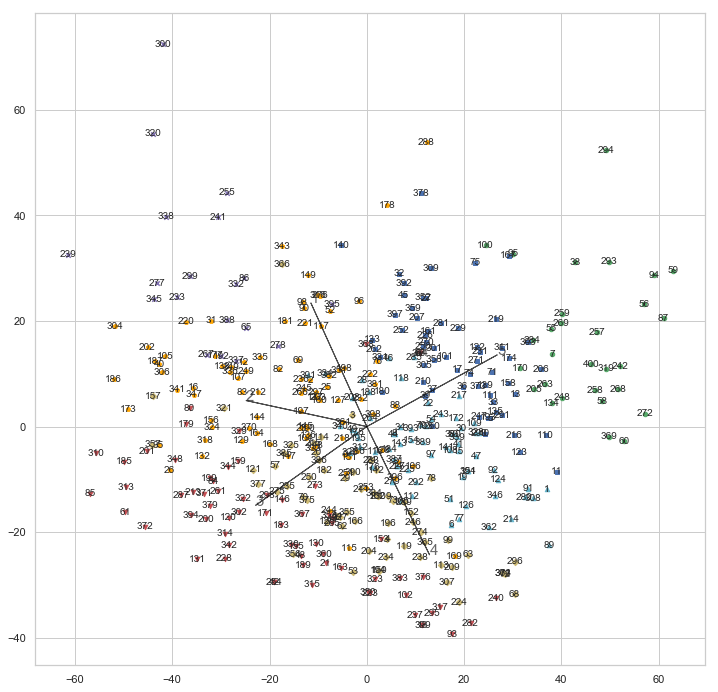

In [131]:
graf_cplot3_text(AQ3_Lk,AQ3_t,5,7, sx=12, sy=12)

In [132]:
AQ3_Lk.loc[K.labels_ == 0,:].tail()

,1,2,3,4,5
385,2,7,10,9,3
386,0,7,10,8,6
390,1,6,8,11,5
394,0,8,16,7,0
399,0,1,10,19,1


In [94]:
AQ3_Lk.loc[202]

1     3
2    16
3     6
4     5
5     1
Name: 202, dtype: int32

In [95]:
AQ3_Lk.loc[239]

1     7
2    15
3     9
4     0
5     0
Name: 239, dtype: int32

In [96]:
AQ3_Lk.loc[309]

1     6
2     1
3     7
4     3
5    14
Name: 309, dtype: int32

In [97]:
AQ3_Lk.loc[174]

1     6
2     1
3     1
4    13
5    10
Name: 174, dtype: int32

In [98]:
AQ3_Lk.loc[293]

1     1
2     0
3     3
4     2
5    25
Name: 293, dtype: int32

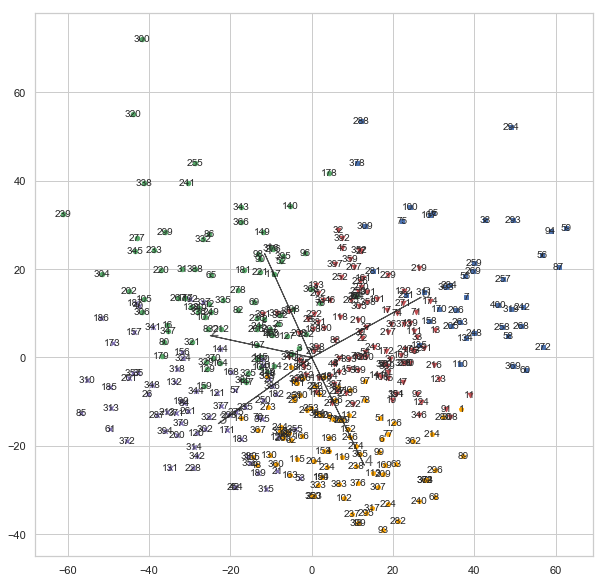

In [99]:
graf_cplot2_text(AQ3_Lk,4,5)

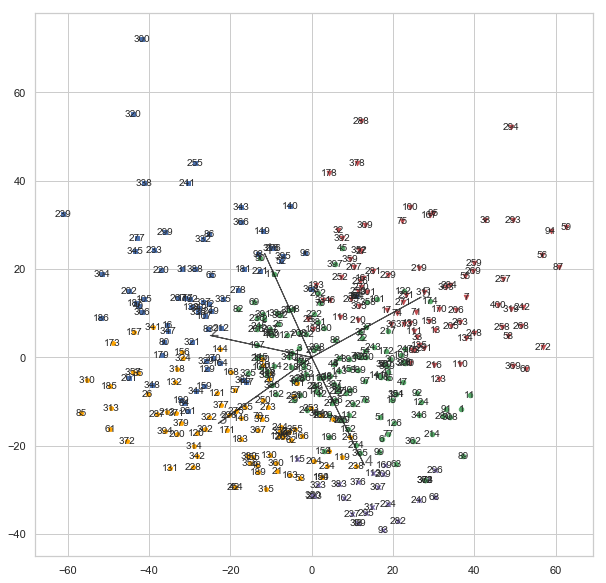

In [100]:
graf_cplot_text(AQ3_Lk,4,5)

In [101]:
km1 = KMeans(n_clusters=5)
km1 = km1.fit(AQ3_Lk)
km1.labels_

array([2, 2, 1, 0, 2, 0, 2, 4, 0, 2, 0, 0, 1, 4, 0, 0, 1, 0, 2, 0, 3, 3,
       0, 1, 0, 1, 3, 0, 0, 2, 0, 1, 0, 4, 0, 3, 0, 0, 4, 0, 3, 0, 3, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 3, 0, 4, 4, 3, 4, 4, 4, 3, 2, 2, 2, 1,
       1, 1, 2, 1, 3, 4, 2, 2, 0, 4, 0, 2, 2, 0, 1, 2, 1, 1, 3, 3, 1, 4,
       0, 2, 1, 0, 0, 2, 4, 4, 1, 0, 1, 2, 4, 0, 2, 0, 1, 1, 2, 1, 0, 0,
       4, 4, 2, 2, 0, 2, 0, 1, 0, 2, 3, 3, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3,
       3, 0, 4, 4, 3, 1, 1, 4, 1, 0, 0, 0, 3, 1, 2, 1, 3, 1, 2, 2, 2, 2,
       0, 2, 3, 3, 4, 1, 1, 0, 2, 2, 1, 2, 2, 4, 3, 2, 4, 3, 0, 3, 0, 0,
       0, 1, 1, 1, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 4, 2, 0, 2, 1,
       1, 3, 3, 3, 1, 1, 2, 4, 4, 0, 0, 2, 0, 2, 1, 3, 2, 1, 0, 0, 2, 4,
       1, 1, 0, 2, 2, 0, 0, 0, 3, 4, 2, 4, 1, 1, 2, 3, 1, 2, 2, 1, 2, 1,
       4, 0, 2, 1, 2, 0, 4, 1, 3, 2, 0, 2, 3, 1, 0, 4, 4, 4, 0, 3, 0, 4,
       0, 2, 1, 1, 4, 4, 4, 0, 4, 2, 2, 3, 1, 1, 1, 0, 2, 4, 2, 0, 4, 0,
       2, 3, 4, 2, 0, 0, 0, 4, 4, 2, 2, 1, 3, 1, 1,

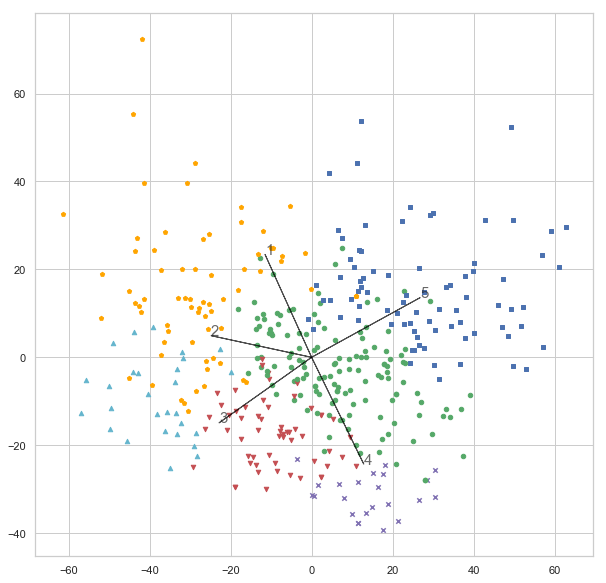

In [102]:
graf_cplot(AQ3_Lk,5,6)

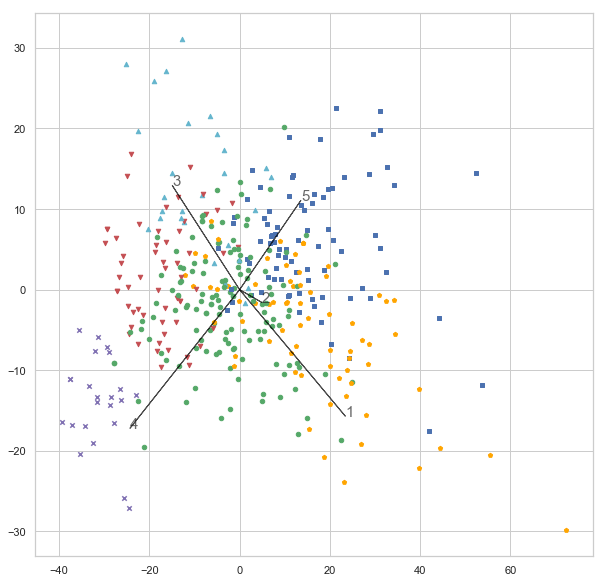

In [103]:
graf_cplot(AQ3_Lk,5,6,1,2)

##### Gruppierung der Strategien nach Kategorien:

In [111]:
strat = {'S1': ['A-Q3_5','A-Q3_6','A-Q3_7','A-Q3_8','A-Q3_9'], 
         'S2': ['A-Q3_1','A-Q3_2','A-Q3_3','A-Q3_4','A-Q3_5'],
         'S3': ['A-Q3_9','A-Q3_10','A-Q3_11','A-Q3_12'],
         'S4': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16','A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S4a': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16'],
         'S4b': ['A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S5': ['A-Q3_21','A-Q3_22','A-Q3_23','A-Q3_24','A-Q3_25'],
         'S6': ['A-Q3_26','A-Q3_27','A-Q3_28','A-Q3_29','A-Q3_30','A-Q3_31']}

* S1: Auf Wortebene - intralingual
* S2: Auf Wortebene - interlingual
* S3: Auf Satz- und Textebene - engerer Kontext
* S4: Auf Satz- und Textebene - weiterer Kontext (S4a: intratextuell, S4b: Bezug zu Fach- und Weltwissen)
* S5: Außersprachlicher Kontext
* S6: Metakognitive Strategien

In [112]:
#Berechnung der Summe der Werte, des Mittelwerts und der Anzahl an Items mit einem bestimmten Wert (individuell):
#Daten.loc[56, strat['S1']].sum()
#Daten.loc[56, strat['S1']].mean()
#(Daten.loc[56, strat['S1']] >= 5).sum()

In [113]:
#Anzahl der TN, die einen Mittelwert >= 3 in der Strategiengruppe S1 aufweisen:
#Daten[Daten[strat['S1']].mean(axis=1) >= 3]

In [114]:
#Anzahl de#Anzahl der TN, die einen Mittelwert >= 3 in der Strategiengruppe S1 aufweisen:r TN, deren Summe der Werte in S1 >= 8 ist:
#Daten[Daten[strat['S1']].sum(axis=1) >= 8].shape[0]

##### Bandbreite und Frequenz der Strategiennutzung:

In der Folge wird berechnet, wie viele TN pro Strategiengruppe mit ihren Angaben einen Durchschnittswert von 3 (Likert) aufweisen und eine Mindestanzahl an Einzelstrategien pro Gruppe mit 3 bewertet haben.

In [115]:
print('S1: '+str(Daten_A3[(Daten_A3[strat['S1']].mean(axis=1) >= 3) & ((Daten_A3[strat['S1']] >= 3).sum(axis=1) >= 2)].shape[0]))
print('S2: '+str(Daten_A3[(Daten_A3[strat['S2']].mean(axis=1) >= 3) & ((Daten_A3[strat['S2']] >= 3).sum(axis=1) >= 2)].shape[0]))
print('S3: '+str(Daten_A3[(Daten_A3[strat['S3']].mean(axis=1) >= 3) & ((Daten_A3[strat['S3']] >= 3).sum(axis=1) >= 2)].shape[0]))
print('S4: '+str(Daten_A3[(Daten_A3[strat['S4']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4']] >= 3).sum(axis=1) >= 4)].shape[0]))
print('S4a: '+str(Daten_A3[(Daten_A3[strat['S4a']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4a']] >= 3).sum(axis=1) >= 2)].shape[0]))
print('S4b: '+str(Daten_A3[(Daten_A3[strat['S4b']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4b']] >= 3).sum(axis=1) >= 2)].shape[0]))
print('S5: '+str(Daten_A3[(Daten_A3[strat['S5']].mean(axis=1) >= 3) & ((Daten_A3[strat['S5']] >= 3).sum(axis=1) >= 2)].shape[0]))
print('S6: '+str(Daten_A3[(Daten_A3[strat['S6']].mean(axis=1) >= 3) & ((Daten_A3[strat['S6']] >= 3).sum(axis=1) >= 3)].shape[0]))

S1: 303
S2: 237
S3: 270
S4: 311
S4a: 287
S4b: 319
S5: 303
S6: 348


Anzahl der TN pro Strategiengruppe, die eine Mindestanzahl an Einzelstrategien pro Gruppe mit 3 bewertet haben:

In [116]:
print('S1: '+str(Daten_A3[(Daten_A3[strat['S1']] >= 3).sum(axis=1) >= 2].shape[0]))
print('S2: '+str(Daten_A3[(Daten_A3[strat['S2']] >= 3).sum(axis=1) >= 2].shape[0]))
print('S3: '+str(Daten_A3[(Daten_A3[strat['S3']] >= 3).sum(axis=1) >= 2].shape[0]))
print('S4: '+str(Daten_A3[(Daten_A3[strat['S4']] >= 3).sum(axis=1) >= 4].shape[0]))
print('S4a: '+str(Daten_A3[(Daten_A3[strat['S4a']] >= 3).sum(axis=1) >= 2].shape[0]))
print('S4b: '+str(Daten_A3[(Daten_A3[strat['S4b']] >= 3).sum(axis=1) >= 2].shape[0]))
print('S5: '+str(Daten_A3[(Daten_A3[strat['S5']] >= 3).sum(axis=1) >= 2].shape[0]))
print('S6: '+str(Daten_A3[(Daten_A3[strat['S6']] >= 3).sum(axis=1) >= 3].shape[0]))

S1: 368
S2: 367
S3: 337
S4: 363
S4a: 353
S4b: 367
S5: 368
S6: 379


Anzahl der TN, die in jeder Strategiengruppe eine Mindestanzahl an Strategien mit 3 bewertet haben:

In [117]:
Daten_A3[(Daten_A3[strat['S1']].mean(axis=1) >= 2) & ((Daten_A3[strat['S1']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S2']].mean(axis=1) >= 2) & ((Daten_A3[strat['S2']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S3']].mean(axis=1) >= 2) & ((Daten_A3[strat['S3']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S4']].mean(axis=1) >= 2) & ((Daten_A3[strat['S4']] >= 3).sum(axis=1) >= 4) & (Daten_A3[strat['S5']].mean(axis=1) >= 2) & ((Daten_A3[strat['S5']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S6']].mean(axis=1) >= 2) & ((Daten_A3[strat['S6']] >= 3).sum(axis=1) >= 3)].shape[0]

256

Anzahl und Prozentsatz der TN, die eine Mindestanzahl an Strategien aus jeder Strategiengruppe mit 3 (Likert) bewertet haben:

In [118]:
def get_good_str(df):
    df_good = df[((df[strat['S1']] >= 3).sum(axis=1) >= 2) & ((df[strat['S2']] >= 3).sum(axis=1) >= 2) & ((df[strat['S3']] >= 3).sum(axis=1) >= 2) & ((df[strat['S4']] >= 3).sum(axis=1) >= 4) & ((df[strat['S5']] >= 3).sum(axis=1) >= 2) & ((df[strat['S6']] >= 3).sum(axis=1) >= 3)]
    return df_good.shape[0], (df_good.shape[0])/(df.shape[0])*100

In [119]:
get_good_str(Daten_A3)

(260, 65.65656565656566)